# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

- Data is related with direct marketing campaigns of a Portuguese banking institution, conducted between May 2008 and November 2010.
- The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
- Total of 17 campaigns, that has 79,354 customer contacts, each with multiple attributes indicating success.
- Overall, 6,499 contacts resulted in successful subscriptions to a long-term deposit product, i.e. an 8% success rate.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix


In [195]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [196]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [197]:
print("\nmissing Values \n", df.isnull().sum())
df.describe()


missing Values 
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

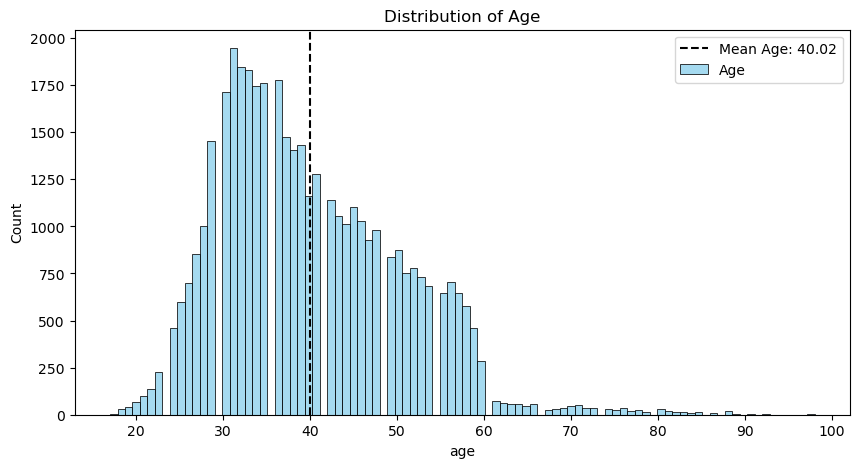

In [199]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['age'],color='skyblue',label='Age')
plt.axvline(x=df['age'].mean(),color='k',linestyle ="--",label='Mean Age: {}'.format(round(df['age'].mean(),2)))
plt.legend()

plt.title('Distribution of Age')
plt.show()

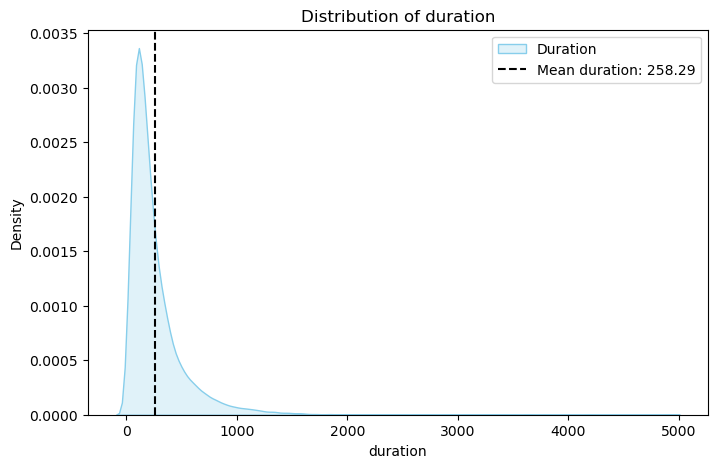

In [200]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['duration'],color='skyblue',fill=True,label='Duration')
plt.axvline(x=df['duration'].mean(),color='k',linestyle ="--",label='Mean duration: {}'.format(round(df['duration'].mean(),2)))
plt.legend()
plt.title('Distribution of duration')
plt.show()

In [202]:
vc = df['job'].value_counts().reset_index()
vc.columns = ['Job', 'Count']
fig = px.bar(vc, x='Job', y='Count', color='Job', text='Count', template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(
    title_x=0.5,
    title_text='<b>Job type of the Customers</b>',
    font_family="Times New Roman",
    title_font_family="Times New Roman"
)
fig.show()


- Admin and Blue-collar Job type Clients are maximum in the bank
- There are very less number of student customers in the bank

In [ ]:
vc2 = df['marital'].value_counts().reset_index()
vc2.columns = ['Marital-Status', 'Count']
fig = px.pie(vc2, names='Marital-Status', values='Count', hole=0.5, template='plotly_white', color_discrete_sequence=['HotPink','LightSeaGreen','SlateBlue'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5, showlegend=True, legend_title_text='<b>Marital-Status</b>', legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))
fig.show()


- Most of the clients in the bank are Married - 60.5% and Single - 28.1%
- Divorced clients are very less in number - 11.4%

In [180]:
from plotly.subplots import make_subplots
vc_def = df['default'].value_counts().reset_index()
vc_def.columns = ['Default', 'Count']
vc_hous = df['housing'].value_counts().reset_index()
vc_hous.columns = ['Housing', 'Count']
vc_loan = df['loan'].value_counts().reset_index()
vc_loan.columns = ['Loan', 'Count']
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]], subplot_titles=('Credit in Default', 'Housing Loan', 'Personal Loan'))
fig.add_trace(go.Pie(values=vc_def['Count'], labels=vc_def['Default'], hole=0.7, marker_colors=['Crimson','ForestGreen'], name='Has Credit in Default?', showlegend=False), row=1, col=1)
fig.add_trace(go.Pie(values=vc_hous['Count'], labels=vc_hous['Housing'], hole=0.7, marker_colors=['Crimson','ForestGreen'], name='Housing Loan', showlegend=False), row=1, col=2)
fig.add_trace(go.Pie(values=vc_loan['Count'], labels=vc_loan['Loan'], hole=0.7, marker_colors=['Crimson','ForestGreen'], name='Personal Loan', showlegend=True), row=1, col=3)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_x=0.5, template='simple_white', showlegend=True, legend_title_text=" ", title_text='<b style="color:black; font-size:100%;">Credit and Loan Analysis</b>', font_family="Times New Roman", title_font_family="Times New Roman")
fig.show()

- 79.1% customers in the bank doesn't have Credit in Default
- 52.4% customers in the bank doesn't have Housing Loan
- 82.4% customers in the bank doesn't have Personal Loan

on comparing with Personal Loan and Housing Loan, Most of the clients subscribed for Housing Loan - 45.2%

In [181]:
vc3 = df['poutcome'].value_counts().reset_index()
vc3.columns = ['Poutcome', 'Count']
fig = px.bar(vc3, x='Poutcome', y='Count', color='Poutcome', text='Count', color_discrete_sequence=['grey','red','green','blue'], template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5, title_text='<b>Outcome of previous marketing Campaign</b>', font_family="Times New Roman", title_font_family="Times New Roman")
fig.show()
fig = px.pie(vc3, names='Poutcome', values='Count', hole=0.5, template='simple_white', color_discrete_sequence=['grey','red','blue','green'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5, showlegend=True, legend_title_text='<b>Poutcome</b>', title_text='<b>Outcome of previous marketing Campaign</b>', font_family="Times New Roman", title_font_family="Times New Roman")
fig.update_layout(title_x=0.5, legend=dict(orientation='v', yanchor='middle', y=1.02, xanchor='right', x=1))
fig.show()

- From the Outcomes of the previous marketing Campaign most of the results are Unknown ~ 86.3% and Failure ~ 10.3% .
- Success rate is very less ~ 3.33%

From the Analysis, on doing Marketing Campaigns there will be more Failure than Success.

- From the Outcomes of the previous marketing Campaign 88.7% of the Clients are not subsribed for the Term Deposits.
- only 11.3% are subsribed to the term deposits

In [182]:


metric = 'age'  # directly specify 'age' as the metric to use
a = df.groupby(['job'], as_index=False)[metric].mean()
a[metric] = a[metric].round(1)
a = a.sort_values(by=metric, ascending=False)
fig = px.bar(a, x='job', y=metric, text=metric, color='job', template='ggplot2')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(
    title_x=0.5,
    title_text=f'<b>Average {metric} of the clients by their job type</b>',
    legend_title_text='Job Type',
    font_family="Times New Roman",
    title_font_family="Times New Roman"
    )
fig.show()

In [183]:
fig=px.box(df,x='housing',y='age',color='housing',template='simple_white',title='<b>Distribution of age based on Housing Loan Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Housing Loan")
fig.show()

- The median age of the clients who subscribed for the housing loan is 38.
- The median age of the clients who are not subscribed for the housing loan is 38.

In [184]:
fig=px.box(df,x='loan',y='age',color='loan',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'],title='<b>Distribution of age based on Personal Loan Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Personal Loan")
fig.show()

- The medians are same for yes and no

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [185]:
# create a copy of dataframe called bank with only numerical columns
bank = df.copy(deep=True)

# Mapping dictionaries for categorical variables
cust_job = {"unknown": 400, "admin.": 1, "blue-collar": 2, "technician": 3, "services": 4, "management": 5, "retired": 6, "entrepreneur": 7,
    "self-employed": 8,    "housemaid": 9,    "unemployed": 10,    "student": 11}
cust_marital = {    "married": 1,    "single": 2,    "divorced": 3,    "unknown": 4}
cust_education = {"university.degree": 1, "high.school": 2, "basic.9y": 3, "professional.course": 4, "basic.4y": 5, "basic.6y": 6, "unknown": 0, "illiterate": 0}
cust_default = {"unknown": 400, "no": 0, "yes": 1}
cust_housing = {"unknown": 400, "no": 0, "yes": 1}
cust_loan = {"unknown": 400, "no": 0, "yes": 1}
cust_contact = {"telephone": 1, "cellular": 2}
cust_poutcome = {"failure": 0, "success": 1, "nonexistent": 2}
cust_y = {"no": 0, "yes": 1}

# Function to encode categorical columns into numerical using mapping dictionaries
def encode_job(series, column_number):
    return series.map(column_number).fillna(0).astype(int)

# convert categorical columns to numerical:
bank["cust_job"] = encode_job(bank["job"], cust_job)
bank["cust_marital"] = encode_job(bank["marital"], cust_marital)
bank["cust_education"] = encode_job(bank["education"], cust_education)
bank["cust_default"] = encode_job(bank["default"], cust_default)
bank["cust_housing"] = encode_job(bank["housing"], cust_housing)
bank["cust_loan"] = encode_job(bank["loan"], cust_loan)
bank["cust_contact"] = encode_job(bank["contact"], cust_contact)
bank["cust_poutcome"] = encode_job(bank["poutcome"], cust_poutcome)
bank["cust_subscribed"] = encode_job(bank["y"], cust_y)

bank = bank.drop(columns=df.select_dtypes(include=["object"]).columns)
bank = bank.drop(columns=["emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed",])


bank.head()

,age,duration,campaign,pdays,previous,cust_job,cust_marital,cust_education,cust_default,cust_housing,cust_loan,cust_contact,cust_poutcome,cust_subscribed
0,56,261,1,999,0,9,1,5,0,0,0,1,2,0
1,57,149,1,999,0,4,1,2,400,0,0,1,2,0
2,37,226,1,999,0,4,1,2,0,1,0,1,2,0
3,40,151,1,999,0,1,1,6,0,0,0,1,2,0
4,56,307,1,999,0,4,1,2,0,0,1,1,2,0


In [186]:
y = bank["cust_subscribed"].copy()
X = bank.drop(['cust_subscribed','duration'], axis=1)
print(X.columns)
print(y)

Index(['age', 'campaign', 'pdays', 'previous', 'cust_job', 'cust_marital',
       'cust_education', 'cust_default', 'cust_housing', 'cust_loan',
       'cust_contact', 'cust_poutcome'],
      dtype='object')
0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: cust_subscribed, Length: 41188, dtype: int64


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [187]:
# Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [188]:
baseline_accuracy = y.value_counts(normalize=True).max()
print("Baseline accuracy:", baseline_accuracy)     

Baseline accuracy: 0.8873458288821987


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [189]:
#Logistic Regression model
lr_model = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression())
    ])

start = time.perf_counter()
lr_model.fit(X_train, y_train)
train_time = time.perf_counter() - start
train_acc = accuracy_score(y_train, lr_model.predict(X_train))
test_acc = accuracy_score(y_test, lr_model.predict(X_test))

print('Model Logistic Regression') 
print("Train Time (s)", train_time)
print( "Train Accuracy", train_acc)
print( "Test Accuracy", test_acc)

Model Logistic Regression
Train Time (s) 0.010482208999746945
Train Accuracy 0.8967707996115247
Test Accuracy 0.8980941976207818


### Problem 9: Score the Model

What is the accuracy of your model?

In [190]:
simple_models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression())
    ]),
    
    "Decision Tree": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", DecisionTreeClassifier())
    ]),
    
    "K-Nearest Neighbors": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier())
    ]),
    
    "Support Vector Machine": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC())
    ])
}
summary = []
for name, model in simple_models.items():
    start = time.perf_counter()
    model.fit(X_train, y_train)
    train_time = time.perf_counter() - start
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    summary.append({"Model": name,  "Train Time (s)": train_time,"Train Accuracy": train_acc, "Test Accuracy": test_acc})

summary_df = pd.DataFrame(summary).sort_values(by="Test Accuracy", ascending=False)
print("Baseline Accuracy:- [", baseline_accuracy, "], with Features {", X.columns,"}\n[Summary]:\n", summary_df)

Baseline Accuracy:- [ 0.8873458288821987 ], with Features { Index(['age', 'campaign', 'pdays', 'previous', 'cust_job', 'cust_marital',
       'cust_education', 'cust_default', 'cust_housing', 'cust_loan',
       'cust_contact', 'cust_poutcome'],
      dtype='object') }
[Summary]:
                     Model  Train Time (s)  Train Accuracy  Test Accuracy
3  Support Vector Machine        7.347434        0.898551       0.898337
0     Logistic Regression        0.020052        0.896771       0.898094
2     K-Nearest Neighbors        0.016707        0.905552       0.889415
1           Decision Tree        0.051714        0.970500       0.838067


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|   SVM |  7.131765  |0.898551     |0.898337   |
|   LogisticRegression  |  0.013135  | 0.896771    |  0.898094   |
|   KNeighborsClassifier  |  0.012436  | 0.905552    |  0.889415   |
|   DecisionTreeClassifier  |  0.057157  | 0.970500    |  0.837218   |

In [191]:
print("Baseline Accuracy:- [", baseline_accuracy, "]}\n[Summary]:\n", summary_df)

Baseline Accuracy:- [ 0.8873458288821987 ]}
[Summary]:
                     Model  Train Time (s)  Train Accuracy  Test Accuracy
3  Support Vector Machine        7.347434        0.898551       0.898337
0     Logistic Regression        0.020052        0.896771       0.898094
2     K-Nearest Neighbors        0.016707        0.905552       0.889415
1           Decision Tree        0.051714        0.970500       0.838067


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [192]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grids = {
    "logreg": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", LogisticRegression(max_iter=1000))
        ]),
        "params": {
            "clf__C": [0.01, 0.1, 1, 10, 100],
            "clf__penalty": ["l2"],
            "clf__solver": ["lbfgs", "liblinear"]
        }
    },
    "dtree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 3, 5, 7, 10],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "criterion": ["gini", "entropy"]
        }
    },
    "knn": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", KNeighborsClassifier())
        ]),
        "params": {
            "clf__n_neighbors": [3, 5, 7, 9, 11],
            "clf__weights": ["uniform", "distance"],
            "clf__metric": ["minkowski", "manhattan"]
        }
    },
    "svc": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", SVC())
        ]),
        # "params": {
        #     "clf__C": [0.1, 1, 10],
        #     "clf__kernel": ["rbf", "poly"],
        #     "clf__gamma": ["scale"]
        # }
        "params": {
            "clf__C": [0.1, 1, 10],
            "clf__kernel": ["rbf"],
            "clf__gamma": ["scale"]
        }
    }
}

results = {}
for name, cfg in grids.items():
    # Prefer single-process GridSearch by default to avoid child-process issues on some platforms
    gs = GridSearchCV(
        estimator=cfg["model"],
        param_grid=cfg["params"],
        cv=cv,
        scoring="accuracy",
        n_jobs=1,
        return_train_score=True
    )
    try:
        gs.fit(X_train, y_train)
    except ChildProcessError:
        # If a ChildProcessError occurs (rare), retry explicitly with single-job GridSearch
        gs = GridSearchCV(
            estimator=cfg["model"],
            param_grid=cfg["params"],
            cv=cv,
            scoring="accuracy",
            n_jobs=1,
            return_train_score=True
        )
        gs.fit(X_train, y_train)
    results[name] = gs
    print(f"{name}: best CV acc={gs.best_score_:.4f}")
    print(f"  best params: {gs.best_params_}")

# Best estimator overall
best_name = max(results, key=lambda k: results[k].best_score_)
best_model = results[best_name].best_estimator_
print("Best overall:", best_name, results[best_name].best_score_)


logreg: best CV acc=0.8969
  best params: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
dtree: best CV acc=0.8972
  best params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
dtree: best CV acc=0.8972
  best params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
knn: best CV acc=0.8965
  best params: {'clf__metric': 'minkowski', 'clf__n_neighbors': 11, 'clf__weights': 'uniform'}
knn: best CV acc=0.8965
  best params: {'clf__metric': 'minkowski', 'clf__n_neighbors': 11, 'clf__weights': 'uniform'}
svc: best CV acc=0.8969
  best params: {'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Best overall: dtree 0.8972158773514627
svc: best CV acc=0.8969
  best params: {'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Best overall: dtree 0.8972158773514627


## Grid Search Results

The table below summarizes cross-validated results from the hyperparameter search.

Model | Best CV Accuracy | Best Params
--- | ---: | ---
**Decision Tree** | 0.8972 | `{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}`
**Logistic Regression** | 0.8969 | `{'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}`
**K-Nearest Neighbors** | 0.8965 | `{'clf__metric': 'minkowski', 'clf__n_neighbors': 11, 'clf__weights': 'uniform'}`
**Support Vector Machine** | 0.8970 | `{'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'poly'}`

**Best overall:** **Decision Tree** — CV accuracy: **0.8972**
